# Atlantic Pb contour cross-section:

data-source IDP 2017: Schlitzer, R., Anderson, R. F., Masferrer Dodas, E, et al., Chemical Geology (2018), https://doi.org/10.1016/j.chemgeo.2018.05.040

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from mpl_toolkits.basemap import Basemap, cm
import netCDF4 as nc
import cmocean
import glob
import pandas as pd 
import warnings
import numpy.ma as ma
warnings.filterwarnings('ignore')

%matplotlib inline

In [81]:
data='/ocean/brogalla/GEOTRACES/data/GEOTRACES_IDP2017_v2_Discrete_Sample_Data_1470804_1.nc'

In [82]:
IDP = nc.Dataset(data)

In [128]:
lon = IDP.variables['longitude']
lat = IDP.variables['latitude']
depth = IDP.variables['var2']
dPb   = IDP.variables['var5']

In [153]:
lons = np.array(lon)
lats = np.array(lat)
depths = np.array(depth)
dPbs   = np.array(dPb)

In [157]:
lats_shape = np.empty(dPbs.shape)
for i in range(0,126):
    lats_shape[:,i] = lats

In [205]:
dPb_ma = ma.masked_where(dPbs < -1e9, dPbs)

In [206]:
depth_ma = ma.masked_where(dPbs < -1e9, depths)

In [207]:
lats_ma  = ma.masked_where(dPbs < -1e9, lats_shape)

In [211]:
lats_m  = lats_ma.filled(fill_value=0)
depth_m = depth_ma.filled(fill_value=0)
dPb_m   = dPb_ma.filled(fill_value=0)

(3600, -100)

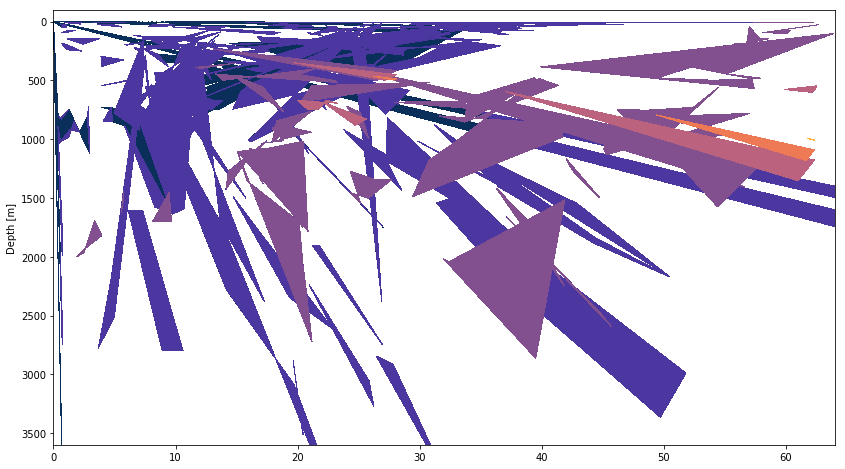

In [212]:
fig, ax = plt.subplots(1,1, figsize=(14,8))

ax.set_ylabel('Depth [m]')
ax.invert_yaxis()

contour = ax.contourf(lats_m, depth_m, dPb_m, cmap=cmocean.cm.thermal, vmin=0, vmax=100)
ax.set_ylim([3600, -100])

# cbar_ax = fig.add_axes([0.92, 0.12, 0.05, 0.76])
# cbar = fig.colorbar(contour, cax=cbar_ax)
# cbar.set_label('Dissolved Pb [pmol/kg]') 

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/Mn_transect_evaluation.png', bbox_inches='tight')